In [78]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [79]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [80]:
batches = unpickle("batches.meta")
print(batches)

{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}


In [90]:
data_batch_1=unpickle("data_batch_1")
data_batch_2=unpickle("data_batch_2")
data_batch_3=unpickle("data_batch_3")
data_batch_4=unpickle("data_batch_4")
data_batch_5=unpickle("data_batch_5")
#test_batch=unpickle("test_batch")

In [91]:
print(data_batch_1)

{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

In [92]:
len(data_batch_1[b'data'])

10000

In [93]:
data_batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [94]:
x_train=[]
for i in range(len(data_batch_1[b'data'])):
  x_train.append(data_batch_1[b'data'][i].reshape(3,32,32).transpose(1,2,0))
for i in range(len(data_batch_2[b'data'])):
  x_train.append(data_batch_2[b'data'][i].reshape(3,32,32).transpose(1,2,0))
for i in range(len(data_batch_3[b'data'])):
  x_train.append(data_batch_3[b'data'][i].reshape(3,32,32).transpose(1,2,0))
for i in range(len(data_batch_4[b'data'])):
  x_train.append(data_batch_4[b'data'][i].reshape(3,32,32).transpose(1,2,0))
for i in range(len(data_batch_5[b'data'])):
  x_train.append(data_batch_5[b'data'][i].reshape(3,32,32).transpose(1,2,0))

In [95]:
print(data_batch_1[b'filenames'])

[b'leptodactylus_pentadactylus_s_000004.png', b'camion_s_000148.png', b'tipper_truck_s_001250.png', b'american_elk_s_001521.png', b'station_wagon_s_000293.png', b'coupe_s_001735.png', b'cassowary_s_001300.png', b'cow_pony_s_001168.png', b'sea_boat_s_001584.png', b'tabby_s_001355.png', b'muntjac_s_001000.png', b'arabian_s_001354.png', b'quarter_horse_s_000672.png', b'passerine_s_000343.png', b'camion_s_001895.png', b'trailer_truck_s_000335.png', b'dumper_s_000821.png', b'alley_cat_s_000200.png', b'accentor_s_000677.png', b'frog_s_001671.png', b'capreolus_capreolus_s_000051.png', b'tomcat_s_000772.png', b'pickerel_frog_s_000446.png', b'bufo_s_001242.png', b'cassowary_s_001246.png', b'toad_s_001748.png', b'cat_s_000081.png', b'chihuahua_s_000825.png', b'alces_alces_s_000959.png', b'stealth_bomber_s_000554.png', b'twinjet_s_000663.png', b'trucking_rig_s_001402.png', b'auto_s_000609.png', b'tabby_cat_s_000983.png', b'wapiti_s_000416.png', b'monoplane_s_000895.png', b'true_cat_s_000247.png',

In [86]:
print(batches[b'label_names'])

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [87]:
print(data_batch_1[b'labels'])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [96]:
x_train = np.asarray(x_train)
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [97]:
y_train = data_batch_1[b'labels']+data_batch_2[b'labels']+data_batch_3[b'labels']+data_batch_4[b'labels']+data_batch_5[b'labels']
print(y_train)
print(len(y_train))

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [99]:
import cv2

In [100]:
from matplotlib import pyplot
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [101]:
print(y_train)
y_train

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [102]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

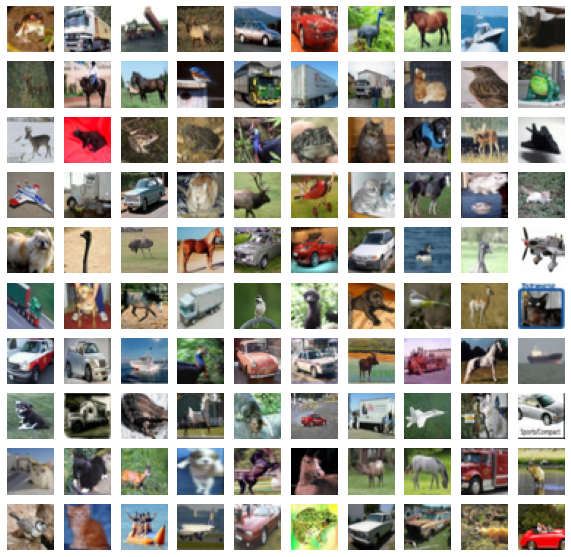

In [103]:
fig = plt.figure(figsize=(10, 10))
for i in range(100):
  fig.add_subplot(10,10, i+1)
  plt.imshow(X_train[i])
  plt.axis('off')

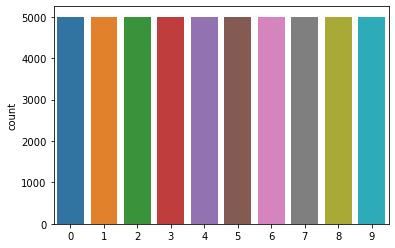

In [104]:
sns.countplot(y_train.flatten())

In [105]:
data_images = X_train.reshape((len(X_train), -1))

In [106]:
data_images

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=uint8)

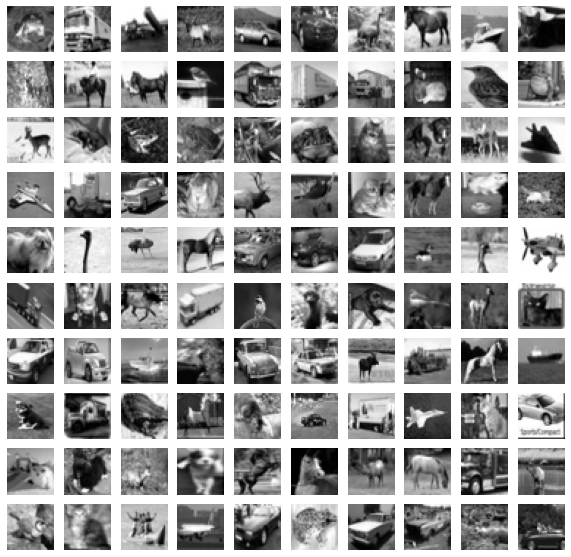

In [107]:
import cv2
X_train_grey=[]
for i in range(len(X_train)):
  X_train_grey.append(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY))

fig = plt.figure(figsize=(10, 10))
for i in range(100):
  fig.add_subplot(10,10, i+1)
  plt.imshow(X_train_grey[i],cmap='gray')
  plt.axis('off')

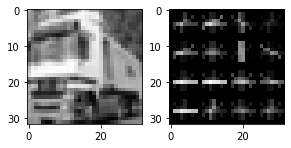

In [108]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

fd,hog_img = hog(X_train_grey[1], pixels_per_cell=(8,8),cells_per_block=(2, 2),orientations=5,visualize=True)
fig = plt.figure(figsize=(25, 25))
fig.add_subplot(10,10,1)
plt.imshow(X_train_grey[1], cmap='gray')
fig.add_subplot(10,10,2)
plt.imshow(hog_img, cmap='gray')
plt.show()

In [109]:
hog_img.shape

(32, 32)

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
scalify = StandardScaler()

In [20]:
#CASE 1: 
X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(12,12),cells_per_block=(2, 2),orientations=5) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(12,12),cells_per_block=(2, 2),orientations=5) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 20)


In [21]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [22]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)
accuracy_score(y_test, y_pred)

[6 0 8 ... 2 8 7]


0.2422

In [23]:
#CASE 2:
X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(4, 4),orientations=1) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(4, 4),orientations=1) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 16)


In [24]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [25]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)
accuracy_score(y_test, y_pred)

[5 9 6 ... 2 2 4]


0.1922

In [26]:
# CASE 3:
X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(2, 2),orientations=5) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(2, 2),orientations=5) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 180)


In [27]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [28]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)

[6 8 1 ... 2 1 7]


In [29]:
y_test=y_test.flatten()

In [30]:
print(accuracy_score(y_test, y_pred))

0.4346


In [31]:
#CASE 4:
X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(2, 2),orientations=9) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(2, 2),orientations=9) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 324)


In [32]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [33]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)
accuracy_score(y_test, y_pred)

[6 8 1 ... 5 1 7]


0.4328

In [34]:
#CASE 5:
X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(4, 4),orientations=9) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(4, 4),orientations=9) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 144)


In [35]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [36]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)
accuracy_score(y_test, y_pred)

[6 8 1 ... 5 2 7]


0.4364

In [37]:
#CASE 6:

X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(4, 4),orientations=7) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(4, 4),orientations=7) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 112)


In [38]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [39]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)
accuracy_score(y_test, y_pred)

[3 8 1 ... 5 4 7]


0.4364

In [40]:
#CASE 7:

X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(1, 1),orientations=9) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(1, 1),orientations=9) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 144)


In [41]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [42]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)
accuracy_score(y_test, y_pred)

[6 8 1 ... 7 1 7]


0.3465

In [43]:
#CASE 8:

X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(6,6),cells_per_block=(2, 2),orientations=5) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(6,6),cells_per_block=(2, 2),orientations=5) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 320)


In [44]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [45]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)

[6 8 7 ... 5 4 7]


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4231

In [47]:
#CASE 9:

X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(6,6),cells_per_block=(2, 2),orientations=5) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(6,6),cells_per_block=(2, 2),orientations=5) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 320)


In [48]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)

[6 8 7 ... 5 4 7]


In [49]:
accuracy_score(y_test, y_pred)

0.4231

In [50]:
#CASE 10:

X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(4,4),cells_per_block=(2, 2),orientations=5) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(4,4),cells_per_block=(2, 2),orientations=5) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 980)


In [51]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [52]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)
accuracy_score(y_test, y_pred)

[5 8 1 ... 5 1 7]


0.445

BEST:

In [53]:
#CASE 5:
X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(4, 4),orientations=9) for img in X_train_grey])
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(8,8),cells_per_block=(4, 4),orientations=9) for img in X_test_grey])
X_test_prepared = scalify.transform(X_test_hog)

(50000, 144)


In [54]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [55]:
y_pred = sgd_clf.predict(X_test_prepared)
print(y_pred)

[6 8 1 ... 5 2 7]


In [56]:
accuracy_score(y_test, y_pred)

0.4364

In [57]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='macro')

0.42721575562168485

In [58]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred,average='macro')

0.4364

In [64]:
from sklearn.metrics import precision_score,confusion_matrix
precision_score(y_test, y_pred, average='micro')

0.4364

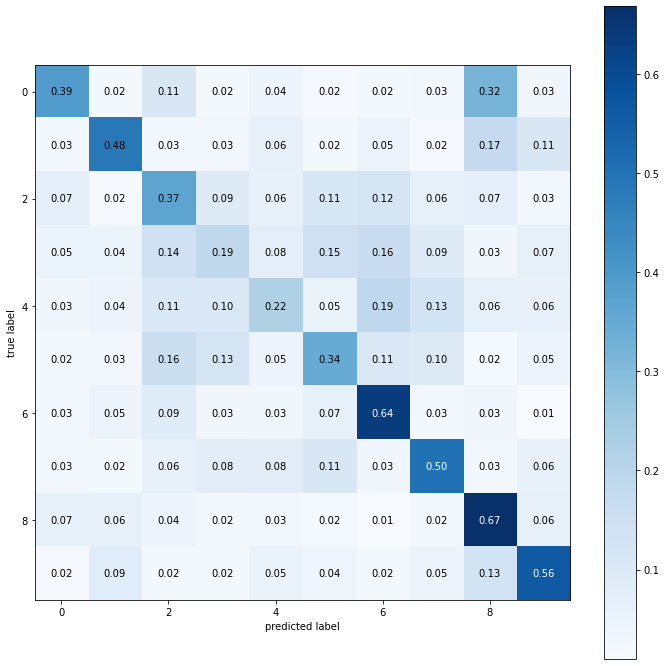

In [65]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred,),figsize=(12, 12),colorbar=True,show_absolute=False,show_normed=True)
plt.show()

In [74]:






#CNN





X_train_prepared[0]

array([ 2.94091152e-01,  5.43745082e-01,  1.66716729e+00, -2.49235468e-01,
       -2.44377926e-01, -5.32919436e-01, -6.85058509e-01, -4.40719577e-01,
       -3.16201049e-01, -2.70353764e-01,  3.02787077e-01,  4.87845694e-01,
        1.14788429e-01, -5.01619293e-01, -4.67643595e-01, -6.47848649e-01,
       -4.05847229e-01, -3.45788482e-01, -6.79534378e-01, -4.98017252e-02,
       -3.80966801e-01, -1.00287509e-01, -3.20761488e-01,  7.95092354e-01,
       -7.89686314e-02,  6.14949107e-01, -2.18634605e-01, -4.51441528e-01,
       -5.41893080e-01, -1.72513608e-02,  1.11097696e+00,  3.42462572e-01,
        4.60637070e-01, -4.83721237e-01,  4.19508000e-01,  1.65403222e-01,
        1.87965930e-02, -4.41256628e-01, -1.26314654e-01, -5.38900957e-01,
       -7.34248106e-01, -2.90198505e-01, -5.44733928e-01, -7.17433789e-01,
       -2.65318348e-01,  6.62936969e-01,  2.38856233e+00,  1.99599679e+00,
        1.22413551e+00,  5.89906814e-01, -3.01151091e-01, -1.16129517e+00,
       -4.47563450e-01, -

In [159]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [172]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
trainY = to_categorical(Y_train)
testY = to_categorical(Y_test)

In [173]:
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
trainX = train_norm / 255.0
testX = test_norm / 255.0

In [176]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [177]:
history = model.fit(trainX, trainY, batch_size=32, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
1250/1250 - 74s - loss: 1.5371 - accuracy: 0.4459 - val_loss: 1.2852 - val_accuracy: 0.5442
Epoch 2/10
1250/1250 - 75s - loss: 1.1096 - accuracy: 0.6084 - val_loss: 1.0651 - val_accuracy: 0.6245
Epoch 3/10
1250/1250 - 73s - loss: 0.8692 - accuracy: 0.6939 - val_loss: 0.9942 - val_accuracy: 0.6606
Epoch 4/10
1250/1250 - 73s - loss: 0.6620 - accuracy: 0.7694 - val_loss: 1.0868 - val_accuracy: 0.6495
Epoch 5/10
1250/1250 - 76s - loss: 0.4662 - accuracy: 0.8360 - val_loss: 1.1329 - val_accuracy: 0.6623
Epoch 6/10
1250/1250 - 74s - loss: 0.3002 - accuracy: 0.8947 - val_loss: 1.3415 - val_accuracy: 0.6579
Epoch 7/10
1250/1250 - 72s - loss: 0.1978 - accuracy: 0.9328 - val_loss: 1.6266 - val_accuracy: 0.6485
Epoch 8/10
1250/1250 - 74s - loss: 0.1573 - accuracy: 0.9451 - val_loss: 1.7405 - val_accuracy: 0.6477
Epoch 9/10
1250/1250 - 70s - loss: 0.1248 - accuracy: 0.9578 - val_loss: 1.8381 - val_accuracy: 0.6585
Epoch 10/10
1250/1250 - 71s - loss: 0.1194 - accuracy: 0.9597 - val_loss:

<function matplotlib.pyplot.show(*args, **kw)>

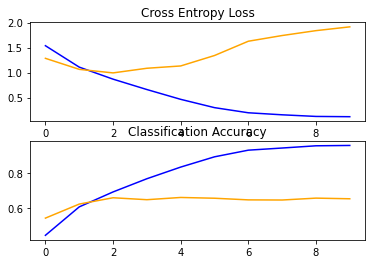

In [178]:
# plot Cross Entropy Loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show

In [179]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 64.460


In [180]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Dropout layer added here
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

Epoch 1/10
1250/1250 - 75s - loss: 1.7529 - accuracy: 0.3602 - val_loss: 1.4096 - val_accuracy: 0.5017
Epoch 2/10
1250/1250 - 79s - loss: 1.3859 - accuracy: 0.5022 - val_loss: 1.2086 - val_accuracy: 0.5652
Epoch 3/10
1250/1250 - 74s - loss: 1.2285 - accuracy: 0.5630 - val_loss: 1.1161 - val_accuracy: 0.6129
Epoch 4/10
1250/1250 - 75s - loss: 1.1248 - accuracy: 0.6034 - val_loss: 1.0953 - val_accuracy: 0.6224
Epoch 5/10
1250/1250 - 80s - loss: 1.0314 - accuracy: 0.6370 - val_loss: 1.0017 - val_accuracy: 0.6516
Epoch 6/10
1250/1250 - 82s - loss: 0.9664 - accuracy: 0.6612 - val_loss: 0.9981 - val_accuracy: 0.6541
Epoch 7/10
1250/1250 - 77s - loss: 0.8987 - accuracy: 0.6816 - val_loss: 0.9631 - val_accuracy: 0.6640
Epoch 8/10
1250/1250 - 72s - loss: 0.8377 - accuracy: 0.7079 - val_loss: 0.9753 - val_accuracy: 0.6666
Epoch 9/10
1250/1250 - 78s - loss: 0.7899 - accuracy: 0.7181 - val_loss: 0.9453 - val_accuracy: 0.6773
Epoch 10/10
1250/1250 - 76s - loss: 0.7556 - accuracy: 0.7348 - val_loss:

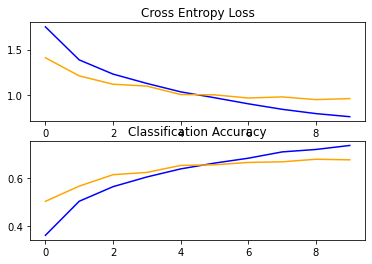

In [181]:
history = model.fit(trainX, trainY, batch_size=32, epochs=10, verbose=2, validation_split=0.2)
# plot Cross Entropy Loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

In [188]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

Epoch 1/10
1250/1250 - 93s - loss: 1.5821 - accuracy: 0.4374 - val_loss: 1.5391 - val_accuracy: 0.4597
Epoch 2/10
1250/1250 - 91s - loss: 1.2319 - accuracy: 0.5578 - val_loss: 1.0862 - val_accuracy: 0.6125
Epoch 3/10
1250/1250 - 95s - loss: 1.0845 - accuracy: 0.6164 - val_loss: 0.9676 - val_accuracy: 0.6618
Epoch 4/10
1250/1250 - 102s - loss: 0.9890 - accuracy: 0.6499 - val_loss: 1.0484 - val_accuracy: 0.6306
Epoch 5/10
1250/1250 - 97s - loss: 0.9153 - accuracy: 0.6754 - val_loss: 0.9198 - val_accuracy: 0.6806
Epoch 6/10
1250/1250 - 106s - loss: 0.8596 - accuracy: 0.6951 - val_loss: 0.8924 - val_accuracy: 0.6858
Epoch 7/10
1250/1250 - 96s - loss: 0.8143 - accuracy: 0.7101 - val_loss: 1.0081 - val_accuracy: 0.6510
Epoch 8/10
1250/1250 - 102s - loss: 0.7656 - accuracy: 0.7301 - val_loss: 0.8255 - val_accuracy: 0.7154
Epoch 9/10
1250/1250 - 98s - loss: 0.7239 - accuracy: 0.7452 - val_loss: 0.9585 - val_accuracy: 0.6744
Epoch 10/10
1250/1250 - 88s - loss: 0.6904 - accuracy: 0.7546 - val_lo

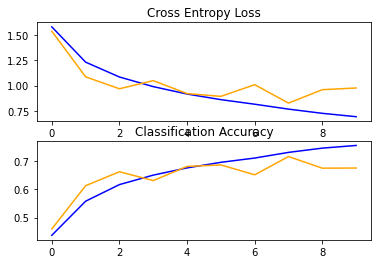

In [189]:
history = model.fit(trainX, trainY, batch_size=32, epochs=10, verbose=2, validation_split=0.2)
# plot Cross Entropy Loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

In [ ]:




#MLP



In [139]:
from sklearn.neural_network import MLPClassifier

In [141]:

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



X_train /= 255
X_test /= 255

In [142]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [143]:
history = model.fit(X_train,y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 5s - loss: 1.8327 - accuracy: 0.3363 - val_loss: 1.7179 - val_accuracy: 0.3882
Epoch 2/15
1250/1250 - 5s - loss: 1.6666 - accuracy: 0.4044 - val_loss: 1.6737 - val_accuracy: 0.4013
Epoch 3/15
1250/1250 - 5s - loss: 1.5955 - accuracy: 0.4293 - val_loss: 1.6316 - val_accuracy: 0.4242
Epoch 4/15
1250/1250 - 5s - loss: 1.5520 - accuracy: 0.4452 - val_loss: 1.5983 - val_accuracy: 0.4342
Epoch 5/15
1250/1250 - 5s - loss: 1.5191 - accuracy: 0.4563 - val_loss: 1.5951 - val_accuracy: 0.4354
Epoch 6/15
1250/1250 - 4s - loss: 1.4879 - accuracy: 0.4676 - val_loss: 1.5627 - val_accuracy: 0.4453
Epoch 7/15
1250/1250 - 4s - loss: 1.4683 - accuracy: 0.4746 - val_loss: 1.5571 - val_accuracy: 0.4485
Epoch 8/15
1250/1250 - 4s - loss: 1.4424 - accuracy: 0.4828 - val_loss: 1.5370 - val_accuracy: 0.4622
Epoch 9/15
1250/1250 - 5s - loss: 1.4239 - accuracy: 0.4880 - val_loss: 1.5816 - val_accuracy: 0.4477
Epoch 10/15
1250/1250 - 5s - loss: 1.4097 - accuracy: 0.4992 - val_loss: 1.5160 - 

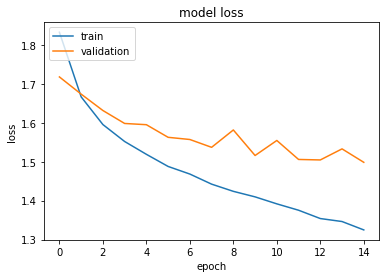

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [146]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
score

[1.4990483522415161, 0.4756999909877777]